In [50]:
import pandas as pd

In [51]:
df=pd.read_csv('raw_data.csv')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5832 entries, 0 to 5831
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   car           5832 non-null   object
 1   varient       5832 non-null   object
 2   km            5832 non-null   object
 3   fuel          5832 non-null   object
 4   transmission  5832 non-null   object
 5   registration  5832 non-null   object
 6   price         5832 non-null   object
 7   location      5832 non-null   object
dtypes: object(8)
memory usage: 364.6+ KB


In [53]:
df[['year','brand','model']]=df['car'].str.split(' ',n=2,expand=True)

In [54]:
df.drop(columns=['car'],inplace=True)

In [55]:
df.head()

,varient,km,fuel,transmission,registration,price,location,year,brand,model
0,LX D 4*4 MT HT,"25,772 km",Diesel,Manual,DL-7C,₹9.40 lakh,new-delhi,2021,Mahindra,Thar
1,1.6 VTVT SX,"51,750 km",Petrol,Manual,DL-5C,₹4.93 lakh,new-delhi,2017,Hyundai,Verna
2,COMFORTLINE TSI 1.0 MT,"47,478 km",Petrol,Manual,DL-7C,₹6.91 lakh,new-delhi,2022,Volkswagen,VIRTUS
3,B6,"29,109 km",Diesel,Manual,DL-3C,₹6.83 lakh,new-delhi,2023,Mahindra,Bolero
4,A,"28,989 km",Petrol,Manual,DL-9C,₹1.61 lakh,new-delhi,2019,Datsun,Redi Go


In [56]:
df['varient']=df['varient'].str.strip()

In [57]:
df['km']=df['km'].str.replace('[, km]','',regex=True).astype('i')

In [58]:
df['registration']=df['registration'].str.extract('^([A-Z]{2})')[0]

In [59]:
def price_covetion(price):
    if str(price).lower()[-4::] in ('lakh'):
        p=str(price).lower().replace(' lakh','')
        return (float(p)*100000)
    elif str(price).lower()[-5::] in ('crore'):
        p=str(price).lower().replace(' crore','')
        return (float(p)*10000000)

In [60]:
df['price'] = df['price'].str.removeprefix('₹').apply(price_covetion).astype('i')

In [61]:
df.head()

,varient,km,fuel,transmission,registration,price,location,year,brand,model
0,LX D 4*4 MT HT,25772,Diesel,Manual,DL,940000,new-delhi,2021,Mahindra,Thar
1,1.6 VTVT SX,51750,Petrol,Manual,DL,493000,new-delhi,2017,Hyundai,Verna
2,COMFORTLINE TSI 1.0 MT,47478,Petrol,Manual,DL,691000,new-delhi,2022,Volkswagen,VIRTUS
3,B6,29109,Diesel,Manual,DL,683000,new-delhi,2023,Mahindra,Bolero
4,A,28989,Petrol,Manual,DL,161000,new-delhi,2019,Datsun,Redi Go


In [62]:
df['transmission'] = df['transmission'].astype('category')
df['registration'] = df['registration'].astype('category')
df['brand'] = df['brand'].astype('category')
df['fuel'] = df['fuel'].astype('category')
df['location'] = df['location'].astype('category')

In [63]:
df['year'] = df['year'].astype('i')

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5832 entries, 0 to 5831
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   varient       5832 non-null   object  
 1   km            5832 non-null   int32   
 2   fuel          5832 non-null   category
 3   transmission  5832 non-null   category
 4   registration  5823 non-null   category
 5   price         5832 non-null   int32   
 6   location      5832 non-null   category
 7   year          5832 non-null   int32   
 8   brand         5832 non-null   category
 9   model         5832 non-null   object  
dtypes: category(5), int32(3), object(2)
memory usage: 191.6+ KB


In [66]:
df=df[['brand','model','varient','year','fuel','transmission','km','price','registration','location']]

In [67]:
pd.options.display.float_format = '{:.2f}'.format

In [68]:
df.describe()[['km','price']]

,km,price
count,5832.00,5832.00
mean,73287.00,492095.43
std,143403.15,442731.30
min,1.00,44000.00
25%,40748.00,260000.00
50%,64055.50,400000.00
75%,90453.25,595000.00
max,10000001.00,14900000.00


In [69]:
df[df['km']==df['km'].max()]

,brand,model,varient,year,fuel,transmission,km,price,registration,location
2482,Mahindra,XUV300,W8 (O) 1.2 PETROL,2019,Petrol,Manual,10000001,581000,RJ,jaipur


In [70]:
df=df[df['price']<1000000]
df.reset_index(drop=True,inplace=True)

In [71]:
df=df[df['km']<=165000]
df.reset_index(drop=True,inplace=True)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5288 entries, 0 to 5287
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   brand         5288 non-null   category
 1   model         5288 non-null   object  
 2   varient       5288 non-null   object  
 3   year          5288 non-null   int32   
 4   fuel          5288 non-null   category
 5   transmission  5288 non-null   category
 6   km            5288 non-null   int32   
 7   price         5288 non-null   int32   
 8   registration  5282 non-null   category
 9   location      5288 non-null   category
dtypes: category(5), int32(3), object(2)
memory usage: 174.1+ KB


In [73]:
df.describe()[['km','price']]

,km,price
count,5288.00,5288.00
mean,67171.72,419531.88
std,33985.01,209218.84
min,1.00,44000.00
25%,40849.00,256000.00
50%,64055.50,383000.00
75%,88860.25,544000.00
max,164861.00,999000.00


In [74]:
df.isna().sum()

brand           0
model           0
varient         0
year            0
fuel            0
transmission    0
km              0
price           0
registration    6
location        0
dtype: int64

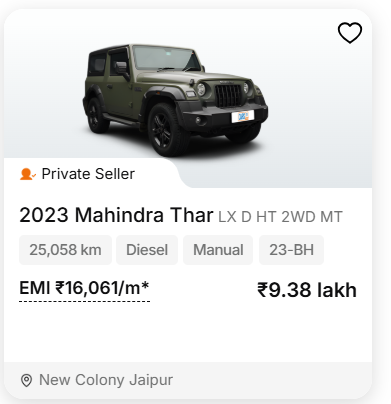

In [75]:
df['registration'] = df['registration'].cat.add_categories(['BH'])
df['registration'] = df['registration'].fillna('BH')

In [76]:
df.isna().sum()

brand           0
model           0
varient         0
year            0
fuel            0
transmission    0
km              0
price           0
registration    0
location        0
dtype: int64

In [77]:
df.to_csv('Cleaned_Data.csv',index=False)